<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Combinatorics 1: Graphs and their Matrices


## Table of contents

- [Counting paths in graphs](#GraphsMatrices)
- [Absorption probabilities](#Escape)

In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *

<a id="Paths"></a>
## Counting paths in graphs

### Exercise 1. A first example
Let $G$ be the following graph:
<img src="figures/GrapheBasique.jpg" style="width: 200px;"/>


<div markdown=1 class="DoIt"> Use the adjacency matrix of $G$ to compute the number of paths of length $20$ from $a$ to $b$ in $G$.

<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste for further questions:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$


<div markdown=1 class="Answers"> 
The number of paths is given by the coefficient $(1,2)$ in $A^{20}$, where $A$ is given by
$$
A=
\begin{matrix}
a \\ b \\ c\\ d
\end{matrix}
\begin{pmatrix}
0 & 1 & 0 & 0\\
1 & 0 & 1 & 1\\
1 & 0 & 0 & 0\\
1 & 0 & 0 & 0
\end{pmatrix}.
$$

In [4]:
AdjacencyMatrix=np.matrix([[0,1,0,0],[1,0,1,1],[1,0,0,0],[1,0,0,0]])
B=AdjacencyMatrix**20
print(str(B[0,1])+' paths of length 20')

1138 paths of length 20


### Exercise 2. Enumeration of words

<div markdown=1 class="DoIt"> We say that a word $w$ with letters $a,b$ is $b$-<i>short</i> if there are never $4$ consecutive $b$'s in $w$. For instance,
$$
w_1=aa\color{green}{b}aaaaaa\color{green}{bbb}aaa\color{green}{b}aa
$$
is $b$-short while
$$
w_2=aa\color{green}{b}aa\color{green}{bb}a\color{red}{bbbbbb}aa\color{green}{bb}a
$$
is not. Let $S_n$ be the number of $b$-short words of length $n$ (the length of a word is the number of letters).

1. Write a script which computes $S_1,S_2,\dots,S_{20}$ using a graph and its adjacency matrix. You can consider the following graph:
<img src="figures/Graphe_aabbbaab.jpg" style="width: 200px;"/>

To check your result: you should obtain something like
```
Number of b-short words =[2, 4, 8, 15, 29,...
```

<div markdown=1 class="Answers"> 
1. The number $S_n$ corresponds to the number of paths of length $n-1$ in the above graph, beginning by $a$ or $b$. For exemple, the word $abbbaa$ (length $6$) corresponds to $a\to b\to b'\to b''\to a\to a$ (length $5$). <br><i>(The vertices $b,b',b''$ ensure that there are never $4$ consecutive $b$'s.)</i>

Therefore $S_n$ is the sum of all coefficients in the two first lines of matrix $A^{n-1}$, where
$$
A=
\begin{matrix}
a \\ b \\ b' \\ b''
\end{matrix}
\begin{pmatrix}
1 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 0
\end{pmatrix}.
$$


In [36]:
# Words in {a,b}^n which avoid bbbb
AdjacencyAdmissible=np.matrix([[1,1,0,0],[1,0,1,0],[1,0,0,1],[1,0,0,0]])
print('Adjacency matrix : ')
print(AdjacencyAdmissible)
List=[]
for n in range(1,21):
    Mat=AdjacencyAdmissible**(n-1)
    MatBis=Mat[0:2,]
    List.append(np.sum(MatBis))
print('Number of b-short words = '+str(List))


Adjacency matrix : 
[[1 1 0 0]
 [1 0 1 0]
 [1 0 0 1]
 [1 0 0 0]]
Number of b-short words = [2, 4, 8, 15, 29, 56, 108, 208, 401, 773, 1490, 2872, 5536, 10671, 20569, 39648, 76424, 147312, 283953, 547337]


<div markdown=1 class="DoIt"> 
We say that a word $w$ with letters $a,b$ is $b$-<i>odd</i> if all the maximal sequences of consecutive $b$'s in $w$ have odd lengths.<br>
For example
$$
w_1=a\color{green}{bbbbb}aaa\color{green}{b}aaaaa
$$
is $b$-odd while
$$
w_2=aaa\color{green}{bbbbb}aa\color{red}{bbbb}a
$$
is not $b$-odd.<br>
Let $D_n$ be the number of $b$-odd words of length $n$. For example, $D_2=3$:
<br><br>
$$
aa,\quad ab,\quad ba
$$
<br>
and $D_3=6$:
<br>
$$
aaa,\quad aab, \quad aba,\quad baa,\quad bab,\quad bbb.
$$

1. Using a graph and its adjacency matrix, write a script which computes $D_1,D_2,\dots,D_{20}$.

<i>(You must carefully explain which graph you choose, and which are the relevant coefficients for the enumeration of $D_n$.)</i>

<div markdown=1 class="Answers"> 
1. We consider the following graph $G$:

<img src="figures/Graphe_bOddWords.jpg" style="width: 250px;"/>

<!--This graph $G$ is designed so that a path in $G$ which begins with $a$ or $b$ and which ends with $a,b$ or $b''$ corresponds to a word in which there is never an even sequence of $b$'s.-->

The number $D_n$ corresponds to the number of paths of length $n-1$ in the above graph, beginning at $a$ or $b$ and ending at $a,b,b''$ (if the path ends at $b'$ then it ends with an even sequence of $b$'s).<br> 
For example the word $aab$ corresponds to the path
$$
a\to a\to b
$$
and the word $baaabbbbb$ corresponds to the path
$$
b \to a\to a \to a\to b\to b'\to b''\to b'\to b''.
$$
Therefore $D_n$ is the sum of all coefficients indexed by
$$
(a,a),(a,b),(a,b''),(b,a),(b,b),(b,b'')
$$
in the matrix $A^{n-1}$, where
$$
A=
\begin{matrix}
a \\ b \\ b' \\ b''
\end{matrix}
\begin{pmatrix}
1 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
1 & 0 & 1 & 0
\end{pmatrix}.
$$
For example, for $n=3$, we have
$$
A^{n-1}=A^2=
\begin{matrix}
a \\ b \\ b' \\ b''
\end{matrix}
\begin{pmatrix}
\boxed{2} & \boxed{1} & 1 & \boxed{0}\\
\boxed{1} & \boxed{1} & 0 & \boxed{1}\\
1 & 0 & 1 & 0\\
1 & 1 & 0 & 1
\end{pmatrix}.
$$
<i>(We framed coefficients which count for the $b$-odd paths, we thus recover $D_3=2+1+1+1+1=6$.)</i>

In [30]:
# b Odd words 
AdjacencybOdd=np.matrix([[1,1,0,0],[1,0,1,0],[0,0,0,1],[1,0,1,0]])
print(AdjacencybOdd)
List=[]
for n in range(1,21):
    Matb=AdjacencybOdd**(n-1)
    MatBis=Matb[0,0]+Matb[0,1]+Matb[0,3]+Matb[1,0]+Matb[1,1]+Matb[1,3]
    #print(MatBis)
    List.append(np.sum(MatBis))
print('Number of b-odd words ='+str(List))


[[1 1 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [1 0 1 0]]
Number of b-odd words =[2, 3, 6, 10, 19, 33, 61, 108, 197, 352, 638, 1145, 2069, 3721, 6714, 12087, 21794, 39254, 70755, 127469]


<a id="Escape"></a>
## Absorption probabilities

### Exercise 3. Labyrinth.

We consider a random robot in the following labyrinth:

<img src="figures/Labyrinthe.jpg" style="width: 250px;"/>

The robot is initially in room $B$ (time $n=0$). At each time step, it chooses uniformly at random one of the doors of the room in which it is located, and passes through that door.<br> If the robot hits Exit $1$ (resp. $2$) it stays at Exit $1$ (resp. $2$) forever.

<div markdown=1 class="DoIt"> 

Let $p(n)$ denote the vector of the probability distribution of the location of the robot at time $n$. More formally,
$$
p(n)=\bigg(p_x(n) \bigg)_{x\in \{A,B,C,D,E,F,\text{Exit }1,\text{Exit }2\}},
$$
where $p_x(n)$ is the probability that the robot is at $x$ at time $n$.

1) Use a transition matrix $M$ to compute approximate values of $p(5), p(2000)$. 

2) Deduce an approximation of the probability that the robot eventually escapes the labyrinth through Exit $1$.

<div markdown=1 class="Answers"> 
1. We consider the following transition matrix:

$$
M= \begin{matrix}
A \\ B \\ C \\ D \\ E \\ F \\ E1 \\ E2
\end{matrix}
\begin{pmatrix}
0 & 1/2 & 0 & 1/2 & 0 & 0 & 0 & 0\\
1/3 & 0 & 1/3 & 0 & 1/3 & 0 & 0 & 0\\
0 & 1/2 & 0 & 0 & 0 & 0 & 1/2 & 0\\
1/3 & 0 & 0 & 0 & 1/3 & 1/3 & 0 & 0\\
0 & 1/3 & 0 & 1/3 & 0 & 0 & 0 & 1/3\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$
We have seen in class that the coefficient $(i,j)$ in $M^{n}$ corresponds to the probability that, starting from $i$-th state, the robot is at $j$ at time $n$. Therefore the desired probability distribution is the $2$d line of $M^{n}$.


In [3]:
A=np.matrix([
[0,0.5,0,0.5,0,0,0,0],
[1/3.0,0,1/3.0,0,1/3.0,0,0,0],
[0,0.5,0,0,0,0,0.5,0],
[1/3.0,0,0,0,1/3.0,1/3.0,0,0],
[0,1/3.0,0,1/3.0,0,0,0,1/3.0],
[0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,1,0],
[0,0,0,0,0,0,0,1],    
])
#print(np.round(A**2000,3))

def ProbaDistribution(n):
    Power=A**(n)
    InitialCondition=[0,1,0,0,0,0,0,0] # easy way to extract the second line
    return InitialCondition*Power

print('------- Question 2 -----')
print('Probability distributions:')
print('p(5) = '+str(np.round(ProbaDistribution(5),3)))
print('p(2000) = '+str(np.round(ProbaDistribution(2000),3)))


------- Question 2 -----
Probability distributions:
p(5) = [[ 0.189  0.     0.092  0.     0.189  0.098  0.241  0.191]]
p(2000) = [[ 0.     0.     0.     0.     0.     0.     0.467  0.533]]


<div markdown=1 class="Answers"> 
2) For $n=2000$ we have that the robot is at Exit $1$ with probability $\approx 0.467$ and at Exit $2$ with probability $0.533$. We see that other coefficients are very close to zero so it is very unlikely that the robot is still in the labyrinth at time $2000$.

Therefore the approximation is $0.467$.

<div markdown=1 class="DoIt">
We still assume that the robot starts at $B$.<br>
Denote by $L_n$  the event "The robot is still in the labyrinth at time $n$" (<i>i.e.</i> it dit not find the exit yet). Use matrix $M$ to plot $n\mapsto \mathbb{P}(L_n)$. (Try $1\leq n\leq 40$.)<br>


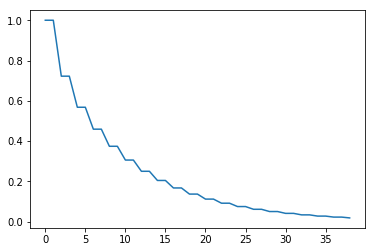

In [32]:
def ProbaNoEscape(n):
    Distribution=ProbaDistribution(n-1)
    return 1-Distribution[0,6]-Distribution[0,7] # returns 1-Proba(Exit 1)-Proba(Exit 2)

#print([ProbaNoEscape(n) for n in range(1,8)])

plt.plot([ProbaNoEscape(n) for n in range(1,40)])
plt.show()


<div markdown=1 class="DoIt"> Use the method seen in class and the function `solve` from `SymPy` to compute the <i>exact</i> probability that starting from $B$ the robot escapes the labyrinth through Exit $1$.<br>
Compare with your approximation obtained previously.

<div markdown=1 class="Answers"> 
Let $p_a$ (resp. $p_b,p_c,\dots$) be the probability that, starting from $A$, the robot escapes at Exit $1$. According the method seen in class, we have that
$$
\begin{cases}
p_a&=\frac{1}{2}p_b+\frac{1}{2}p_d\\
p_b&=\frac{1}{3}p_a+\frac{1}{3}p_c+\frac{1}{3}p_e\\
p_c&=\frac{1}{2}p_b+\frac{1}{2}\\
p_d&=\frac{1}{3}p_a+\frac{1}{3}p_e+\frac{1}{3}p_f\\
p_e&=\frac{1}{3}p_b+\frac{1}{3}p_d\\
p_d&=p_f\\
\end{cases}
$$
We solve this system with the code below and obtain indeed
$$
p_b=\frac{7}{15}\approx 0.4666...
$$

In [7]:
var('a b c d e f')
solve(
[
2*a-b-d, # equation for p_a
3*b-a-c-e, # equation for p_b
2*c-b-1,# ...
3*d-a-e-f,
3*e-b-d,
f-d    
],
[a,b,c,d,e,f]  # unknowns
)

{a: 2/5, b: 7/15, c: 11/15, d: 1/3, e: 4/15, f: 1/3}